In the [reverse probability page]({{ site.baseurl }}/chapters/10/first_bayes)
we played a game with two boxes, with different proportions of red and green
balls.

The [Bayes bars page]({{ site.baseurl }}/chapters/10/bayes_bars) has a way of
thinking of our calculations for this game, using the height of bars to
express our probabilities.

Now we extend the game to more options.

Now I have five boxes:

* BOX1 has one red ball and four green balls.
* BOX2 has two red balls and three green balls.
* BOX3 has three red balls and two green balls.
* BOX4 has four red balls and one green ball.
* BOX5 has five red balls.

The game proceeds as before:

* I offer you one of these five boxes at random, without telling you which.
* You draw a ball at random from the box, and you get a red ball.
* Now, what is the probability that I gave you BOX4?

First we will solve this by simulation. Then we will solve it by expressing
the calculation we illustrated with the bars from the Bayes bars page.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Here is the simulation.  It is a small modification from the simulation in the reverse probability page.

In [2]:
n_iters = 10000
box_nos = np.repeat([1], n_iters)
ball_colors = np.repeat(['green'], n_iters)
for i in np.arange(n_iters):
    # Choose a box number randomly.
    box_no = np.random.choice([1, 2, 3, 4, 5])
    # Create the box with the correct numbers of red and green.
    box = np.repeat(['red', 'green'], [box_no, 5-box_no])
    # Draw a ball from the box
    ball_color = np.random.choice(box)
    # Store the results.
    box_nos[i] = box_no
    ball_colors[i] = ball_color
# Make the results into a data frame.
trial_results = pd.DataFrame()
trial_results['box no'] = box_nos
trial_results['ball color'] = ball_colors
trial_results.head()

,box no,ball color
0,3,red
1,2,green
2,1,green
3,1,red
4,5,red


Calculate the proportion of "red" trials that came from BOX4:

In [3]:
# Of the trials giving a red ball, what proportion came from box 4?
red_ball_trials = trial_results[trial_results['ball color'] == 'red']
p_box4 = np.count_nonzero(red_ball_trials['box no'] == 4) / len(red_ball_trials)
p_box4

0.25938281901584653

Here are the initial probabilities of the boxes.

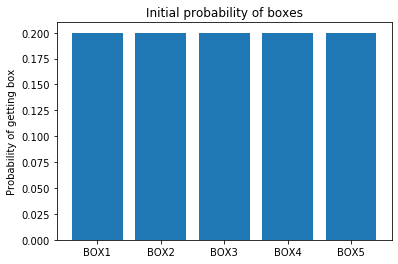

In [4]:
box_probabilities = np.repeat(1 / 5, 5)
x_locations = np.arange(5)
box_labels = ['BOX1', 'BOX2', 'BOX3', 'BOX4', 'BOX5']
plt.bar(x_locations, box_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting box")
plt.title('Initial probability of boxes');

We display the probabilities of getting a red ball from boxes 1 through 5:

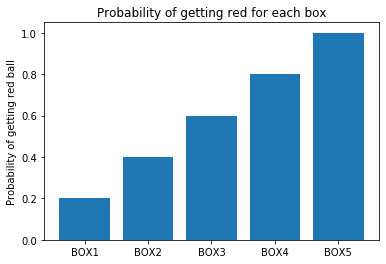

In [5]:
red_probabilities = np.array([1, 2, 3, 4, 5]) / 5
plt.bar(x_locations, red_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting red ball")
plt.title('Probability of getting red for each box');

Next we combine the two steps, of getting a box, and then drawing a ball.

As before, we do this by multiplying the values expressed by heights in the
first bar graph, by the values expressed by heights in the second bar graph.

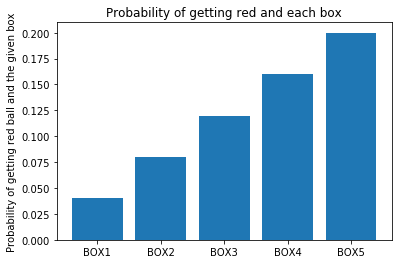

In [6]:
box_and_red_probs = box_probabilities * red_probabilities
plt.bar(x_locations, box_and_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting red ball and the given box")
plt.title('Probability of getting red and each box');

In this case, as before, where all the initial probabilities of the boxes are
the same, this last bar graph is just the second bar graph scaled down by 1/5.

Lastly, remember we are interested in the probability that we started with
BOX4, given we have a red ball.

To get this probability, we first take the probability of getting a red ball
*and* BOX4.  This is the fourth bar on the graph above - 0.2 * 0.8 = 0.4.

Next we divide by the overall probability of getting a red ball, which is the
sum of the heights of the five bars above.

We can do this calculation by dividing the heights of the bars above by the
sum of the heights, so the heights of the bars now sum to 1.

In [7]:
# Overall probability of getting a red ball.
np.sum(box_and_red_probs)

0.6000000000000001

Here are the bars divided by this sum:

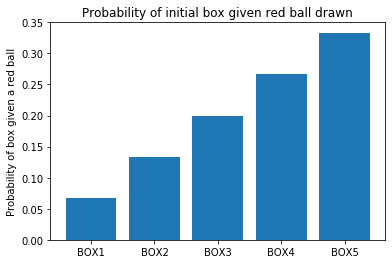

In [8]:
box_given_red_probs = box_and_red_probs / np.sum(box_and_red_probs)
plt.bar(x_locations, box_given_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of box given a red ball")
plt.title('Probability of initial box given red ball drawn');

The probability we want is the height of the fourth bar:

In [9]:
box_given_red_probs[3]

0.26666666666666666

The probability that we drew from BOX5 (given we have a red ball) is the height
of the fifth bar:

In [10]:
box_given_red_probs[4]

0.3333333333333333

We can estimate this from the simulation as well:

In [11]:
# Of the trials giving a red ball, what proportion came from box5?
red_ball_trials = trial_results[trial_results['ball color'] == 'red']
p_box4 = np.count_nonzero(red_ball_trials['box no'] == 5) / len(red_ball_trials)
p_box4

0.33711426188490407

As we saw the [Bayes bars]({{ site.baseurl }}/chapters/10/bayes_bars) page,
because all the boxes have equal probability, we can skip the calculation step
that scales by the box probability, and take the following shortcut:

In [12]:
# Skipping scaling by box probabilities, when probabilities are equal.
box_given_red_probs = red_probabilities / np.sum(red_probabilities)
# We get the same result as before.
box_given_red_probs

array([0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333])

## Towards confidence

Now let me ask a different question.

What is the probability that the red ball came from *any* of boxes 2 through
5?

This is just the sum of the adjusted probabilities above, for boxes 2 through
5.  Remember the sum of all the adjusted probabilities is 1.

In [13]:
np.sum(box_given_red_probs)

1.0

In [14]:
# Probability that red ball came from any of boxes 2 through 5.
red_from_box_2_5 = np.sum(box_given_red_probs[1:])
red_from_box_2_5

0.9333333333333333

Put another way:

If I draw a red ball, there is a 93% chance that the box I drew from was one of
BOX2 through BOX5.

Put yet another way:

If I draw a red ball, I have 93% confidence that I have drawn from one of BOX2
through BOX5.

This is the logic for *Bayesian confidence intervals*.  These are sometimes
called [credible intervals](https://en.wikipedia.org/wiki/Credible_interval).
We can reason about plausible states of the world that led to our results.  In
our case we can reason about which box we have drawn from (state of the
world), given we have seen a red ball (the result).

We will soon see that we can apply this logic when we want to reason about ---
for example --- the relationship of the mean of a sample (the result) to the
mean for a whole population (the state of the world).